# Бриф

Необходимо построить сквозную аналитику для салона красоты. У салона есть реклама в онлайне и сайт, через который можно оставить заявку на услугу. 

# Задача

Нужно проследить путь от клика по рекламному объявлению до покупки и, таким образом, оценить эффективность маркетинга. 

> Клик по рекламе трансформируется в лид (заявку), а лид превращается в клиента, который уже может совершить некоторое количество покупок.

# 📚 1. Импорт

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# 🛒 2. Загрузка файла

https://drive.google.com/file/d/1h87CdXJ9A6gVeKA_HfSHnyDsAoDRxjKM/view?usp=sharing - ads

https://drive.google.com/file/d/168k12wl3eVbX7gX2vIVLoPZ76KuwT-VS/view?usp=sharing - purcahse

https://drive.google.com/file/d/1jlH-sawHyBgB7CEuSJjfOeubncOg8Ks9/view?usp=sharing - leads

In [2]:
!gdown 1h87CdXJ9A6gVeKA_HfSHnyDsAoDRxjKM
!gdown 168k12wl3eVbX7gX2vIVLoPZ76KuwT-VS
!gdown 1jlH-sawHyBgB7CEuSJjfOeubncOg8Ks9

Downloading...
From: https://drive.google.com/uc?id=1h87CdXJ9A6gVeKA_HfSHnyDsAoDRxjKM
To: /content/ads.csv
100% 612k/612k [00:00<00:00, 120MB/s]
Downloading...
From: https://drive.google.com/uc?id=168k12wl3eVbX7gX2vIVLoPZ76KuwT-VS
To: /content/purchases.csv
100% 6.02M/6.02M [00:00<00:00, 207MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jlH-sawHyBgB7CEuSJjfOeubncOg8Ks9
To: /content/leads.csv
100% 2.22M/2.22M [00:00<00:00, 132MB/s]


In [3]:
ads = pd.read_csv('/content/ads.csv')

In [4]:
ads.head()

,created_at,d_ad_account_id,d_utm_source,d_utm_medium,d_utm_campaign,d_utm_content,d_utm_term,m_clicks,m_cost
0,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8404700756,NaN,2.0,48.840
1,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476161,NaN,3.0,100.776
2,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476162,NaN,1.0,10.140
3,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476163,NaN,0.0,0.000
4,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476164,NaN,0.0,0.000


In [5]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       8602 non-null   object 
 1   d_ad_account_id  8602 non-null   object 
 2   d_utm_source     8602 non-null   object 
 3   d_utm_medium     8602 non-null   object 
 4   d_utm_campaign   8602 non-null   int64  
 5   d_utm_content    8602 non-null   int64  
 6   d_utm_term       0 non-null      float64
 7   m_clicks         8602 non-null   float64
 8   m_cost           8602 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 605.0+ KB


- 8 столбцов
- 8602 строки
- пустой столбец d_utm_term
- столбец created_at неверный формат 

In [6]:
leads = pd.read_csv('/content/leads.csv')

In [7]:
leads.head()

,lead_created_at,lead_id,d_lead_utm_source,d_lead_utm_medium,d_lead_utm_campaign,d_lead_utm_content,d_lead_utm_term,client_id
0,2022-10-16,d8c4a9e8-4d4a-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,d8c4a9e9-4d4a-11ed-907e-848f69e142cf
1,2022-10-16,c48f9767-4d4a-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,c48f9768-4d4a-11ed-907e-848f69e142cf
2,2022-10-16,d74ac455-4d49-11ed-907e-848f69e142cf,vkontakte,social,kartasetevaya,NaN,NaN,f64c97d5-31ff-11ea-abeb-c412f533dba1
3,2022-10-16,0f69e77d-4d46-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-16,620ee1eb-4d45-11ed-907e-848f69e142cf,ycard,social,all,NaN,NaN,NaN


In [8]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23540 entries, 0 to 23539
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_created_at      23540 non-null  object
 1   lead_id              23540 non-null  object
 2   d_lead_utm_source    12331 non-null  object
 3   d_lead_utm_medium    10100 non-null  object
 4   d_lead_utm_campaign  9569 non-null   object
 5   d_lead_utm_content   3338 non-null   object
 6   d_lead_utm_term      328 non-null    object
 7   client_id            18601 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


- 8 столбцов
- 23540 строки
- пропуски в d_lead_utm_source d_lead_utm_medium d_lead_utm_campaign d_lead_utm_content d_lead_utm_term client_id
- столбец lead_created_at неверный формат 

In [9]:
purch = pd.read_csv('/content/purchases.csv')

In [10]:
purch.head()

,purchase_created_at,purchase_id,client_id,m_purchase_amount
0,2022-02-21,d3198d39-6d16-40c9-bff7-aa28bd6e2991,7011bdcd-6fd8-11e7-80fc-c412f533dba1,9950.0
1,2022-02-21,48a0ad24-77aa-4064-a971-dd0d6f1f6c50,a2771bb0-6fd6-11e7-80fc-c412f533dba1,8700.0
2,2022-02-21,267ff20f-a56c-480a-b2f7-1f7b1a746f9f,2687f503-6fd7-11e7-80fc-c412f533dba1,0.0
3,2022-02-21,19fba5f0-785d-45bd-903a-34ba529c6404,01122a97-45bc-11eb-ac23-c412f533dba1,8700.0
4,2022-02-21,00ac921d-32e3-4200-9435-a46d5fef4a29,a55b8c4e-d5a3-11e9-abbe-c412f533dba1,500.0


In [11]:
purch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66180 entries, 0 to 66179
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   purchase_created_at  66180 non-null  object 
 1   purchase_id          66180 non-null  object 
 2   client_id            66179 non-null  object 
 3   m_purchase_amount    66180 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


- 4 столбцa
- 66180 строк
- пропуски в client_id
- столбец purchase_created_at неверный формат

# 💡 3. Описание и предобработка данных

In [12]:
ads['d_utm_source'].unique()

array(['yandex'], dtype=object)

- источник рекламы только яндекс, значит в таблице leads будем искать только его

In [13]:
ads['d_utm_medium'].unique()

array(['cpc'], dtype=object)

- cpc, в таблице leads ищем только  cpc

In [14]:
# номера рекламных компаний
ads['d_utm_campaign'].unique()

array([48306435, 48306450, 48306473, 48306487, 48306494, 48306518,
       48306461, 48306469, 60279528, 72000794])

In [15]:
# по видимому номера рекламных объявлений
ads['d_utm_content'].unique()

array([ 8404700756,  8813476161,  8813476162,  8813476163,  8813476164,
        8404701659,  8404701661,  8404701663,  8404701664,  8404701665,
        8404704716,  8813432765,  8404707409,  8404707410,  8813469519,
        8813469520,  8813469521,  8813469522,  8404707871,  8404707872,
        8813466151,  8813466152,  8813466153,  8813466154,  8404708310,
        8404708311,  8404708336,  8813477635,  8404700757,  8404704717,
        8813432766,  8813477625,  8813477632,  8813477634,  8813477629,
        8813477630,  8404708337,  8813477636,  8813477638,  8404708298,
        8813477631,  8813432767,  8404708324,  8813477623,  8813477637,
        8813432768,  8813477627,  8813477628,  8404708323,  8813477633,
        8404708297,  8813477624,  8813477626,  8404702652,  8404702653,
        8404702654,  8404702655,  8404702656,  8404702658,  8404702659,
        8404702661,  8404702662,  8404702664,  8404702665,  8404702667,
        8404702668,  8404702669,  8404702670,  8404702671,  8404

In [16]:
# удаляем пустой стобец ads
ads = ads.drop('d_utm_term', axis=1)

In [17]:
# удаляем аналогичный стобец leads
leads = leads.drop('d_lead_utm_term', axis=1)

In [18]:
# делаем одинаковые названия колонок для двух таблицы
leads.columns = ['created_at', 'lead_id', 'utm_source', 'utm_medium',
       'utm_campaign', 'utm_content', 'client_id']

In [19]:
# делаем одинаковые названия колонок для двух таблицы
ads.columns = ['created_at', 'ad_account_id', 'utm_source', 'utm_medium',
       'utm_campaign', 'utm_content', 'm_clicks', 'm_cost']

In [20]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   created_at     8602 non-null   object 
 1   ad_account_id  8602 non-null   object 
 2   utm_source     8602 non-null   object 
 3   utm_medium     8602 non-null   object 
 4   utm_campaign   8602 non-null   int64  
 5   utm_content    8602 non-null   int64  
 6   m_clicks       8602 non-null   float64
 7   m_cost         8602 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 537.8+ KB


In [21]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23540 entries, 0 to 23539
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   created_at    23540 non-null  object
 1   lead_id       23540 non-null  object
 2   utm_source    12331 non-null  object
 3   utm_medium    10100 non-null  object
 4   utm_campaign  9569 non-null   object
 5   utm_content   3338 non-null   object
 6   client_id     18601 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [22]:
ads['utm_campaign'].unique()

array([48306435, 48306450, 48306473, 48306487, 48306494, 48306518,
       48306461, 48306469, 60279528, 72000794])

In [23]:
leads['utm_campaign'].unique()

array([nan, 'kartasetevaya', 'all', 'student', '15', '2', '900', '100',
       'fizmega', '1', '50', '78599498', '48306487', '48306435',
       '48306494', '1310', '3', '48306473', '48306450', '1rubl', 'akcii',
       '48306518', '600', 'bchk', '70', 'massage30', 'skidka_na_pt',
       'massage', '590', 'boxdety', '9000', 'outdoor', 'clients_day',
       '23849174920830725', 'Поиск II Брендовые запросы',
       '23849173065740725', '14', '30', '23849240299850725', '60279528',
       '23849255068610725', 'fitboxing', 'fizmefa', '700', 'welcome',
       'leto3', 'leto', 'lift', 'fitboxingvk', 'setevaya8', '8655725448',
       'fitnessleto', 'fitness25', 'detfitness', '8', 'zav', 'sixplussix',
       'deti290', 'denclienta', '6 6', 'inbody', 'detsifitnes', '1-3',
       'zapisnatrenirovk', 'trenirovki', '4cluba', '90', '-90', 'freemk',
       'letofitness', '3mes', '5500', '55', 'smart', '2022podarok',
       'kviz', '31-07', 'klient', '72000794', '290', '27-07-2', '27-07',
       'sale90

- в таблице ads utm_campaign и utm_content имеют формат int, в таблице leads формат этих столбцов object. Выделим из таблицы leads только числовые значения. 

In [24]:
# осталвяем только числовые данные, меняем тип
leads['utm_campaign'] = leads['utm_campaign'].str.extract('(\d+)').dropna().astype(int)

In [25]:
# осталвяем только числовые данные, меняем тип
leads['utm_content'] = leads['utm_content'].str.extract('(\d+)').dropna().astype(int)

# 📑 4. Создание основной таблицы

- соеденения ads и leads происходит по 5 из 6 столбцам, так как один столбец был полностью пустой.
- соеденяем с помощью left чтобы все значения из таблицы ads остались 

In [26]:
df = (ads.merge(leads, 
             on=['created_at', 'utm_source', 'utm_medium', 'utm_campaign', 'utm_content'], 
             how='left')
      )

In [27]:
df.head()

,created_at,ad_account_id,utm_source,utm_medium,utm_campaign,utm_content,m_clicks,m_cost,lead_id,client_id
0,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8404700756,2.0,48.840,NaN,NaN
1,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476161,3.0,100.776,NaN,NaN
2,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476162,1.0,10.140,NaN,NaN
3,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476163,0.0,0.000,NaN,NaN
4,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476164,0.0,0.000,NaN,NaN


In [28]:
df = df.merge(purch, on='client_id', how='left')

In [29]:
df.head()

,created_at,ad_account_id,utm_source,utm_medium,utm_campaign,utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount
0,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8404700756,2.0,48.840,NaN,NaN,2022-09-09,df9c9346-322f-4e25-a495-e01e97d0bd0b,24990.0
1,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476161,3.0,100.776,NaN,NaN,2022-09-09,df9c9346-322f-4e25-a495-e01e97d0bd0b,24990.0
2,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476162,1.0,10.140,NaN,NaN,2022-09-09,df9c9346-322f-4e25-a495-e01e97d0bd0b,24990.0
3,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476163,0.0,0.000,NaN,NaN,2022-09-09,df9c9346-322f-4e25-a495-e01e97d0bd0b,24990.0
4,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476164,0.0,0.000,NaN,NaN,2022-09-09,df9c9346-322f-4e25-a495-e01e97d0bd0b,24990.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10055 entries, 0 to 10054
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_at           10055 non-null  object 
 1   ad_account_id        10055 non-null  object 
 2   utm_source           10055 non-null  object 
 3   utm_medium           10055 non-null  object 
 4   utm_campaign         10055 non-null  int64  
 5   utm_content          10055 non-null  int64  
 6   m_clicks             10055 non-null  float64
 7   m_cost               10055 non-null  float64
 8   lead_id              2531 non-null   object 
 9   client_id            2162 non-null   object 
 10  purchase_created_at  9351 non-null   object 
 11  purchase_id          9351 non-null   object 
 12  m_purchase_amount    9351 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


- после соеденения видно что клиентов присоеденилось 2162, могу предположить что остальная реклама из ads клиентов не принесла или система не зафиксировала.

## 4.1 Исправление данных

In [31]:
# дату в правильный формат
df['purchase_created_at'] = pd.to_datetime(df['purchase_created_at'], format='%Y-%m-%d')
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d')

## 4.2 Поиск дубликатов

In [32]:
# проверка на явные дубликаты
df.duplicated().sum()

0

- если предположить что на кажого уникального клиента должен быть id уникальной покупки (например когда покупатель приходит в салон красоты и делает стрижку, получает чек с номером, затем возвращается и покупает краску для волом и получается еще один чек с другим номером, одинакового номера чека быть не может)

In [33]:
df.duplicated(subset=['client_id', 'purchase_id']).sum()

7964

In [34]:
df[df.duplicated(subset=['client_id', 'purchase_id'])].head(2)

,created_at,ad_account_id,utm_source,utm_medium,utm_campaign,utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount
1,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476161,3.0,100.776,NaN,NaN,2022-09-09,df9c9346-322f-4e25-a495-e01e97d0bd0b,24990.0
2,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476162,1.0,10.140,NaN,NaN,2022-09-09,df9c9346-322f-4e25-a495-e01e97d0bd0b,24990.0


In [35]:
# удаляем дубликаты где один клиен но одинаковые id покупки
df = df.drop_duplicates(subset=['client_id', 'purchase_id'])

- посмотрим есть ли лиды и одинаковые чеки

In [36]:
df.duplicated(subset=['lead_id', 'purchase_id']).sum()

0

- так же можно проверить есть ли покупки по одному чеку, где несколько клиентов

In [37]:
df.groupby('purchase_id')['client_id'].nunique().reset_index().query('client_id > 1')

,purchase_id,client_id


In [38]:
df.head()

,created_at,ad_account_id,utm_source,utm_medium,utm_campaign,utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount
0,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8404700756,2.0,48.840,NaN,NaN,2022-09-09,df9c9346-322f-4e25-a495-e01e97d0bd0b,24990.0
5,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701659,15.0,496.896,136c5ccc-16e9-11ed-9074-848f69e142cf,6ba575d8-f458-11ec-9070-848f69e142cf,2022-06-25,1c40ccbb-af39-48d6-8931-e217f665b4fc,0.0
7,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701661,5.0,124.704,8c5a5080-16f8-11ed-9074-848f69e142cf,ddb3e740-a856-11ec-905f-848f69e142cf,2022-03-20,1337d48f-993c-4d58-884d-45126a0f33e4,0.0
8,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701661,5.0,124.704,8c5a5080-16f8-11ed-9074-848f69e142cf,ddb3e740-a856-11ec-905f-848f69e142cf,2022-03-30,327f9ca8-ab45-46cd-ae39-303fce562ab2,285.0
9,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701661,5.0,124.704,8c5a5080-16f8-11ed-9074-848f69e142cf,ddb3e740-a856-11ec-905f-848f69e142cf,2022-08-08,8e090ba8-e323-4189-bb3c-d9e1483a7212,6194.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 10014
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           2091 non-null   datetime64[ns]
 1   ad_account_id        2091 non-null   object        
 2   utm_source           2091 non-null   object        
 3   utm_medium           2091 non-null   object        
 4   utm_campaign         2091 non-null   int64         
 5   utm_content          2091 non-null   int64         
 6   m_clicks             2091 non-null   float64       
 7   m_cost               2091 non-null   float64       
 8   lead_id              2090 non-null   object        
 9   client_id            2090 non-null   object        
 10  purchase_created_at  1400 non-null   datetime64[ns]
 11  purchase_id          1400 non-null   object        
 12  m_purchase_amount    1400 non-null   float64       
dtypes: datetime64[ns](2), float64(3)

## 4.3 Поиск аномалий

In [40]:
df.describe()

,utm_campaign,utm_content,m_clicks,m_cost,m_purchase_amount
count,2.091000e+03,2.091000e+03,2091.000000,2091.000000,1400.000000
mean,4.870879e+07,8.556162e+09,9.493544,235.437188,3256.417857
std,3.050973e+06,4.641013e+08,6.093241,176.803721,4251.174905
min,4.830644e+07,8.404701e+09,0.000000,0.000000,0.000000
25%,4.830645e+07,8.404702e+09,4.000000,99.816000,60.000000
50%,4.830645e+07,8.404702e+09,9.000000,193.524000,680.000000
75%,4.830649e+07,8.404708e+09,14.000000,328.896000,6990.000000
max,7.200079e+07,1.184486e+10,30.000000,983.964000,48600.000000


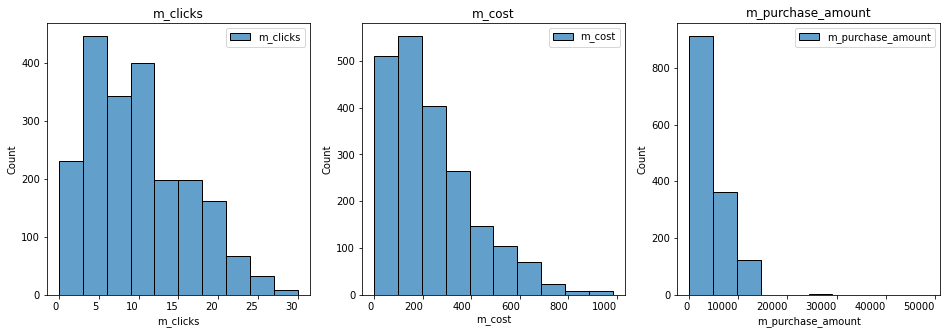

In [41]:
cat_columns = df[['m_clicks', 'm_cost', 'm_purchase_amount']]


plt.figure(figsize=(16,5))
for i, column in enumerate(sorted(cat_columns)):
    plt.subplot(1,3,i+1)
    plt.title(column)
    sns.histplot(df, x=column, discrete=False, alpha=0.7, bins=10)
    plt.legend([column])
    plt.xticks(rotation=0,
      horizontalalignment='right',
      fontweight='light',
      fontsize='medium',)
plt.show()

- в целом данные выгялдят нормально, нет каких то аномальных или минусовых значений.

# 4.4 Атрибуция лид - покупка

> Каждому лиду “в зачет” идут только те покупки, которые клиент сделал в первые 15 дней после создания заявки. Из-за особенности бизнеса соотношение лидов и продаж - многие ко многим. Существующий клиент может купить услугу повторно через заведение новой заявки, а может создать две заявки подряд и после этого сделать покупку. 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 10014
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           2091 non-null   datetime64[ns]
 1   ad_account_id        2091 non-null   object        
 2   utm_source           2091 non-null   object        
 3   utm_medium           2091 non-null   object        
 4   utm_campaign         2091 non-null   int64         
 5   utm_content          2091 non-null   int64         
 6   m_clicks             2091 non-null   float64       
 7   m_cost               2091 non-null   float64       
 8   lead_id              2090 non-null   object        
 9   client_id            2090 non-null   object        
 10  purchase_created_at  1400 non-null   datetime64[ns]
 11  purchase_id          1400 non-null   object        
 12  m_purchase_amount    1400 non-null   float64       
dtypes: datetime64[ns](2), float64(3)

In [43]:
# считаем разницу дней
df['datediff'] = (df['purchase_created_at'] - df['created_at']).dt.days

In [44]:
# фильтр по условию
df = df.query('datediff <= 15')

- обрати внимание, когда делаем фильтр, все пустые значения исключатся так как мы не можем идентифицировать такие покупки по условию.

In [45]:
df.head()

,created_at,ad_account_id,utm_source,utm_medium,utm_campaign,utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount,datediff
5,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701659,15.0,496.896,136c5ccc-16e9-11ed-9074-848f69e142cf,6ba575d8-f458-11ec-9070-848f69e142cf,2022-06-25,1c40ccbb-af39-48d6-8931-e217f665b4fc,0.0,-44.0
7,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701661,5.0,124.704,8c5a5080-16f8-11ed-9074-848f69e142cf,ddb3e740-a856-11ec-905f-848f69e142cf,2022-03-20,1337d48f-993c-4d58-884d-45126a0f33e4,0.0,-141.0
8,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701661,5.0,124.704,8c5a5080-16f8-11ed-9074-848f69e142cf,ddb3e740-a856-11ec-905f-848f69e142cf,2022-03-30,327f9ca8-ab45-46cd-ae39-303fce562ab2,285.0,-131.0
9,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701661,5.0,124.704,8c5a5080-16f8-11ed-9074-848f69e142cf,ddb3e740-a856-11ec-905f-848f69e142cf,2022-08-08,8e090ba8-e323-4189-bb3c-d9e1483a7212,6194.0,0.0
13,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701665,20.0,385.896,dd50a605-1714-11ed-9074-848f69e142cf,ca65c322-1ac9-11ec-9045-848f69e142c9,2022-04-20,0d25f368-820a-4f22-97e8-157b704b98e8,390.0,-110.0


- в таблице видим минусовые значения дат, думаю что это старые клиенты которы покупали уже ранее, но потом некорые из них пригли по рекламе. Так или иначе они не удовлетворяют условиям задачи.

In [46]:
df = df.query('0 <= datediff <= 15')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 9 to 10014
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           493 non-null    datetime64[ns]
 1   ad_account_id        493 non-null    object        
 2   utm_source           493 non-null    object        
 3   utm_medium           493 non-null    object        
 4   utm_campaign         493 non-null    int64         
 5   utm_content          493 non-null    int64         
 6   m_clicks             493 non-null    float64       
 7   m_cost               493 non-null    float64       
 8   lead_id              493 non-null    object        
 9   client_id            493 non-null    object        
 10  purchase_created_at  493 non-null    datetime64[ns]
 11  purchase_id          493 non-null    object        
 12  m_purchase_amount    493 non-null    float64       
 13  datediff             493 non-null

In [48]:
df.describe()

,utm_campaign,utm_content,m_clicks,m_cost,m_purchase_amount,datediff
count,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000
mean,4.883513e+07,8.551937e+09,9.955375,258.356398,5066.527383,3.847870
std,3.503147e+06,5.212884e+08,6.238977,198.888413,4289.391110,3.901113
min,4.830644e+07,8.404701e+09,0.000000,0.000000,0.000000,0.000000
25%,4.830645e+07,8.404702e+09,4.000000,103.812000,290.000000,1.000000
50%,4.830645e+07,8.404702e+09,10.000000,210.588000,6320.000000,3.000000
75%,4.830645e+07,8.404708e+09,15.000000,347.724000,8700.000000,5.000000
max,7.200079e+07,1.184486e+10,30.000000,983.964000,24990.000000,15.000000


- в табилце есть 0 значений по выручке, возможно оплата была бонусами или каким то еще способом. Считаю что удалять такие значения не стоит. 
- есть значения с 0 кликов, возможно это тех сбой, реклама в них равна 0. Стоит ли их удалять? Я не знаю, поэтому оставлю.

In [49]:
df.query('m_clicks == 0')

,created_at,ad_account_id,utm_source,utm_medium,utm_campaign,utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount,datediff
1203,2022-07-29,xo-for-client-ya,yandex,cpc,48306487,8404707410,0.0,0.0,65dd46f7-0f0c-11ed-9074-848f69e142cf,9dec048c-62a4-11ea-abf3-c412f533dba1,2022-07-31,f517ae11-d2fc-441a-86eb-eeaf378c5325,7500.0,2.0
1699,2022-01-24,xo-for-client-ya,yandex,cpc,48306435,8404700756,0.0,0.0,dcb7474e-7c8c-11ec-9058-848f69e142c9,9a2b8bc2-64bd-11ec-9056-848f69e142cf,2022-01-24,2fe279ff-761b-4019-971d-929bf50f762a,9400.0,0.0
1700,2022-01-24,xo-for-client-ya,yandex,cpc,48306435,8404700756,0.0,0.0,dcb7474e-7c8c-11ec-9058-848f69e142c9,9a2b8bc2-64bd-11ec-9056-848f69e142cf,2022-01-31,e4751be8-7a53-4846-a48b-1b6afe5c7d2c,50.0,7.0
2479,2022-03-11,xo-for-client-ya,yandex,cpc,48306461,8404702656,0.0,0.0,a5b29608-a102-11ec-905e-848f69e142cf,5e204ae9-6fd8-11e7-80fc-c412f533dba1,2022-03-14,5b08ee84-9aed-475b-8d63-b03b3ad885a8,290.0,3.0
4544,2022-04-07,xo-for-client-ya,yandex,cpc,48306518,8813477637,0.0,0.0,dd25cca0-b676-11ec-9062-848f69e142cf,ad3b5807-bcdd-11e8-ab73-c412f533dba1,2022-04-12,bd85a83b-c4d5-4694-85bf-034607b62581,7700.0,5.0


# 🧮 5. Итоговый результат

In [50]:
# расход на рекламу
df['adv_spend'] = df['m_cost'] * df['m_clicks']

In [51]:
# cpl
df['cpl'] = df['adv_spend'] / df['lead_id'].count()

In [52]:
# roas
df['roas'] = df['m_purchase_amount'] / df['adv_spend']

In [53]:
# заглушки чтобы посчитать количество для отчета
df['cnt_lead'] = 1
df['cnt_purchase'] = 1

In [54]:
# создание таблицы по условиям тех задания
report = df[['created_at', 'utm_source', 'utm_medium', 'utm_campaign', 'm_clicks', 'adv_spend', 'cnt_lead', 'cnt_purchase', 'm_purchase_amount', 'cpl', 'roas']]

In [55]:
report = report.rename(columns={'created_at': 'Дата', 
                       'utm_source': 'UTM source',
                       'utm_medium': 'UTM medium',
                       'utm_campaign': 'UTM campaign',
                       'm_clicks': 'Количество кликов',
                       'adv_spend': 'Расходы на рекламу',
                       'cnt_lead': 'Количество лидов',
                       'cnt_purchase': 'Количество покупок',
                       'm_purchase_amount': 'Выручка от продаж',
                       'cpl': 'CPL',
                       'roas': 'ROAS'})

In [56]:
report = report.sort_values(by='Дата')

In [57]:
report.head()

,Дата,UTM source,UTM medium,UTM campaign,Количество кликов,Расходы на рекламу,Количество лидов,Количество покупок,Выручка от продаж,CPL,ROAS
1401,2022-01-04,yandex,cpc,48306450,10.0,2410.080,1,1,290.0,4.888600,0.120328
1400,2022-01-04,yandex,cpc,48306450,10.0,2410.080,1,1,9700.0,4.888600,4.024763
1399,2022-01-04,yandex,cpc,48306450,10.0,2410.080,1,1,0.0,4.888600,0.000000
1415,2022-01-05,yandex,cpc,48306450,11.0,2391.180,1,1,290.0,4.850264,0.121279
1482,2022-01-06,yandex,cpc,48306450,12.0,2711.376,1,1,290.0,5.499748,0.106957


In [58]:
report.to_excel('report.xlsx')

🙂 Спасибо за интересное тестовое задание! 